## Regions use in existing evaluation scheme
Here we will showcase the example where there is an existing evaluation tools that calculates IOU and RMSE for binary and prediction evaluation. The idea is that we do not want to replace the existing methods but supplement its evaluation by using the regions approach.

In [10]:
import importlib
from functools import partial
from utils import *

root_dir = add_root_to_path(2)

from sep.inspect.utils import *
import sep.inspect.regions as regions_inspect
import sep.assessors.regions as regions
import sep._commons.visuals as visuals
import imageio

### Prepare input data

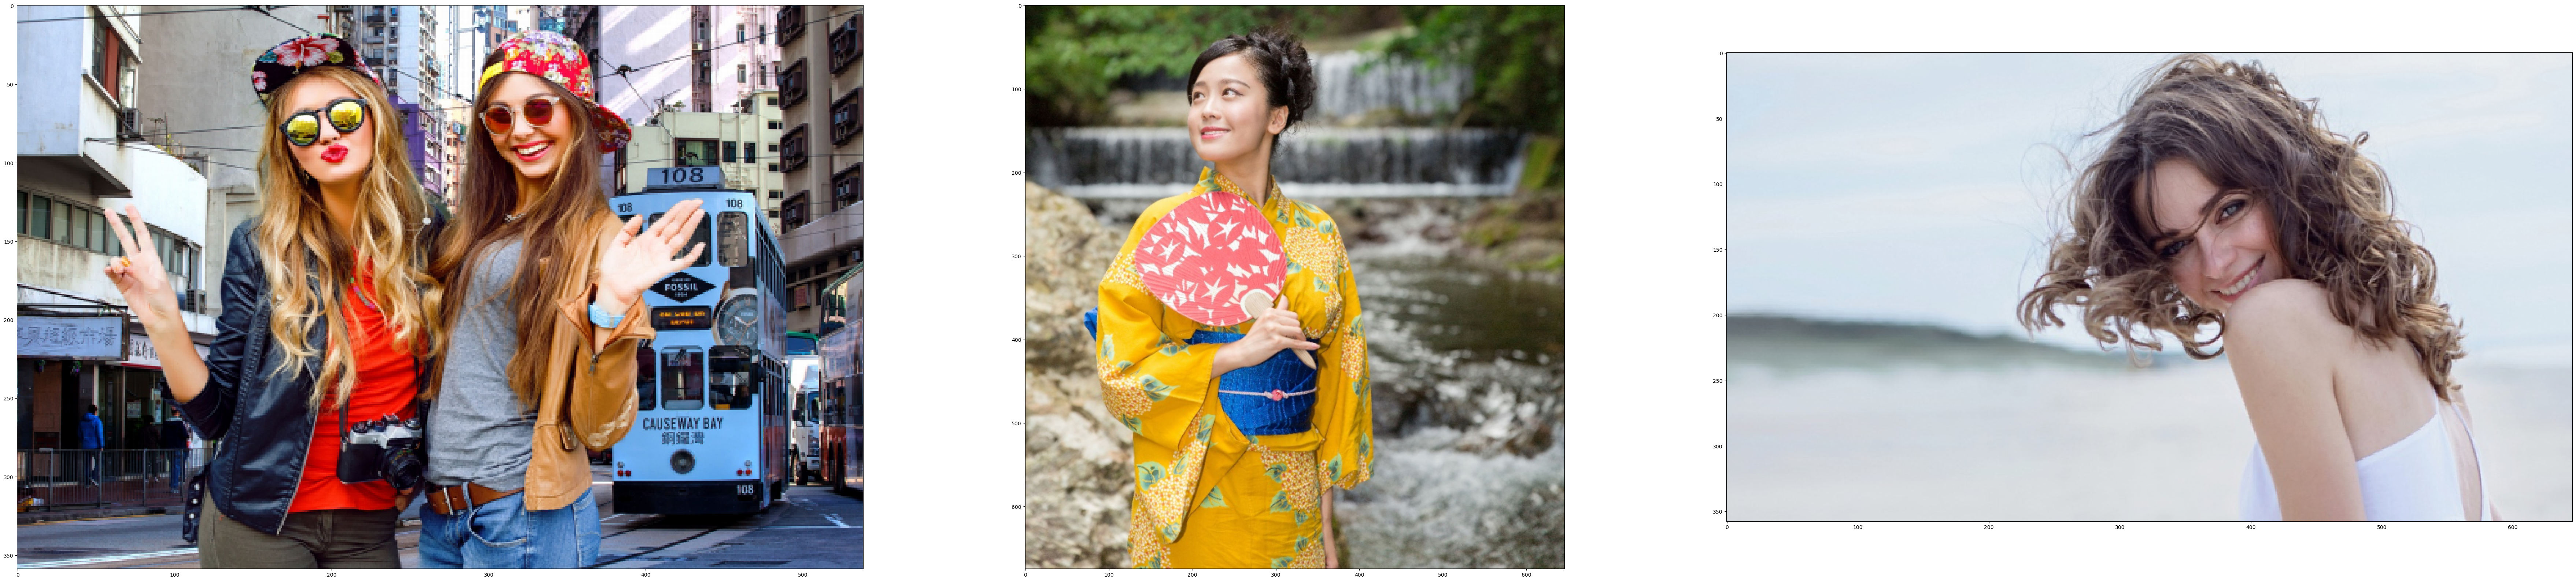

In [14]:
import sep.loaders.images
data_root = pick_path([root_dir / "tests" / "input" / "basics"])
example_data_dir = pick_path([root_dir / "examples" / "using_regions_data"])
dataset = data_root / "humans"
data_loader = sep.loaders.images.ImagesLoader.from_tree(str(dataset))

show(data_loader[0]['image'], data_loader[1]['image'], data_loader[2]['image'])

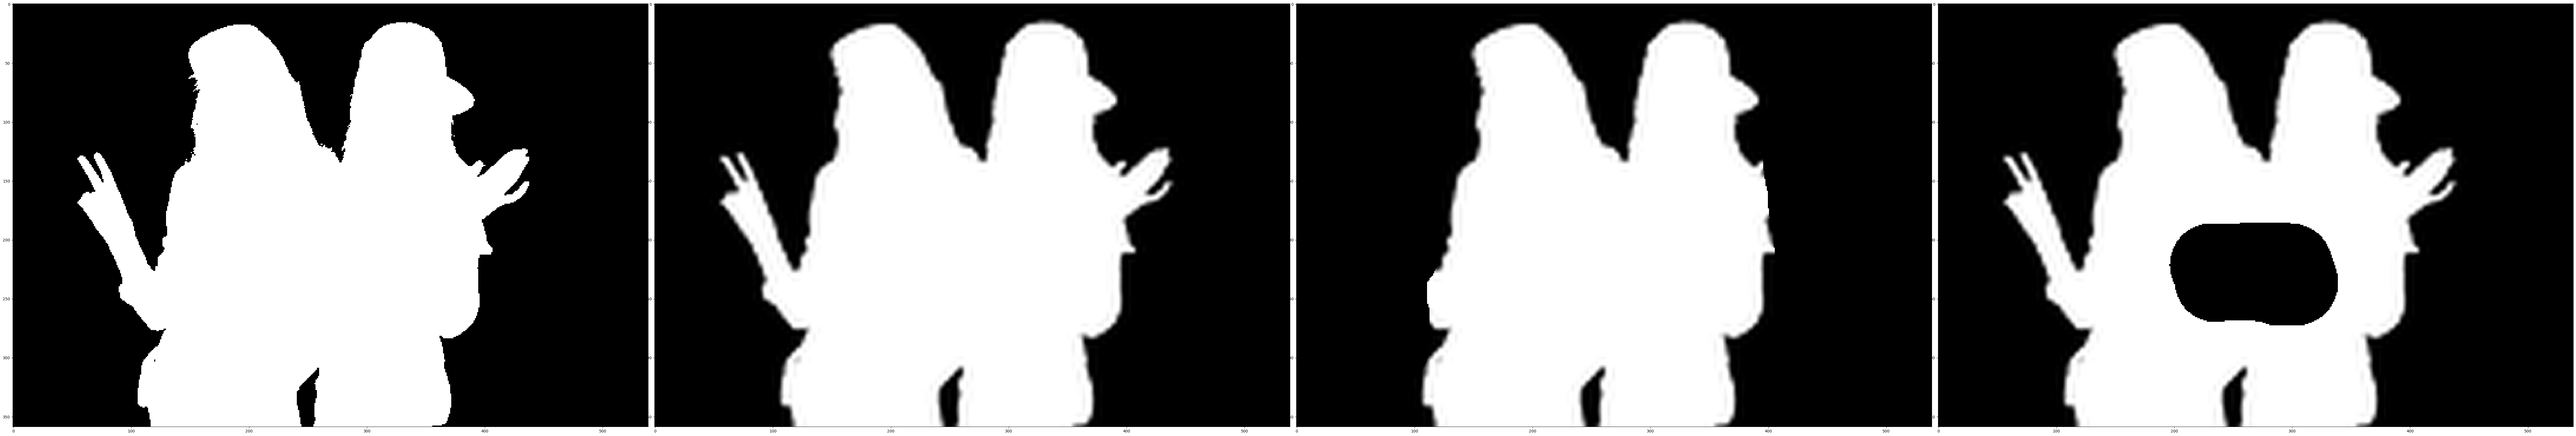

In [15]:
image = data_loader[0]['image']
annotation = data_loader[0]['annotation']
seg_1_low_res = imageio.imread(example_data_dir / "human_1_seg_low_res.png")
seg_1_no_hands = imageio.imread(example_data_dir / "human_1_seg_no_hand.png")
seg_1_no_robust = imageio.imread(example_data_dir / "human_1_seg_non_robust.png")
show(annotation, seg_1_low_res, seg_1_no_hands, seg_1_no_robust)

## Show regions for the datasets

In [23]:
regioners_standard = regions.set_standard
regioners_dict = {str(regioner): regioner.extract_region for regioner in regioners_standard}

In [145]:
def calculate_region_proportions(data_sample, region):
    annotation = data_sample['annotation']
    region_array = region.extract_region(annotation)
    annotation_proportions = (annotation > 0).sum() / annotation.size
    region_proportions = region_array.sum() / annotation.size
    annotation_in_region_proportions = (region_array * (annotation > 0)).sum() / annotation.size
    return (region_proportions, annotation_proportions, annotation_in_region_proportions)

def calculate_region_proportionals(data_loader, region):
    res = []
    for data_sample in data_loader:
        res.append(calculate_region_proportions(data_sample, region))
    return res

def show_regions_proportions(data_loader, region):
    printmd(f"*{str(region)}*")
    metrics = calculate_region_proportionals(data_loader, region)
    plt.plot(list(range(len(metrics))), metrics)
    plt.show()

def show_regions(data_sample, regions):
    res = []
    for region in regions:
        metrics = calculate_region_proportions(data_sample, region)
        print(f"Result for {region} is: {metrics}.")
        res.append(region.extract_region(data_sample['annotation']))
    show(*res)

*Entire image*

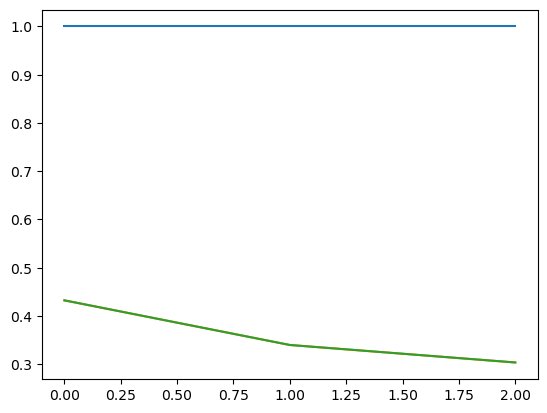

In [139]:
show_regions_proportions(data_loader, regioners_standard[0])

*No edges pixels*

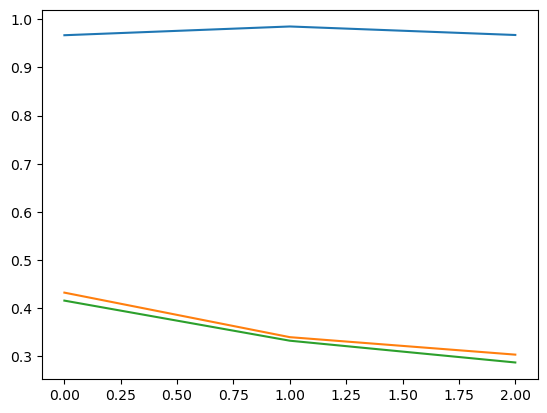

In [140]:
show_regions_proportions(data_loader, regioners_standard[1])

*Mask precision*

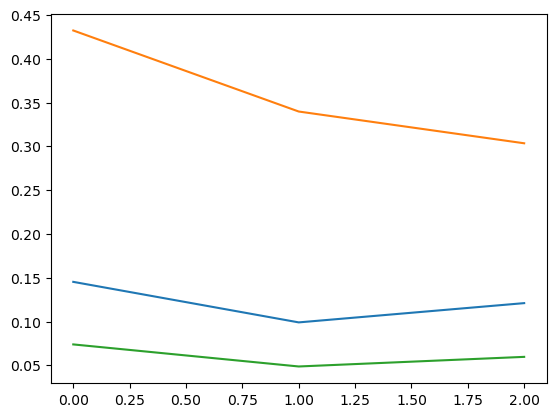

In [122]:
show_regions_proportions(data_loader, regioners_standard[2])

*Mask robust*

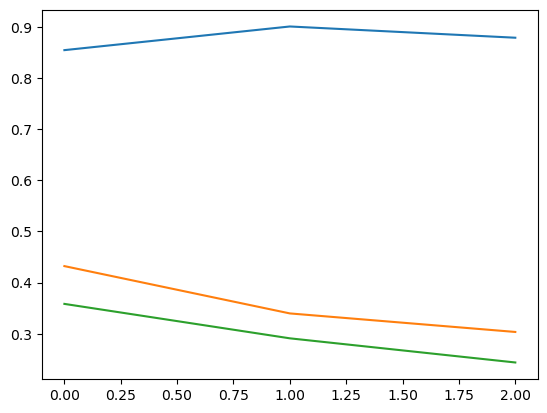

In [123]:
show_regions_proportions(data_loader, regioners_standard[3])

*Mask details*

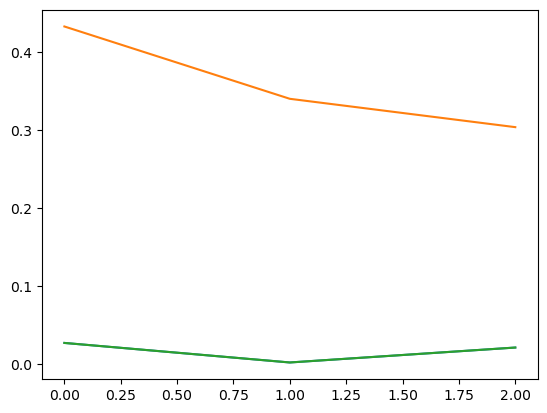

In [124]:
show_regions_proportions(data_loader, regioners_standard[4])

Result for Entire image is: (1.0, 0.33977296181630545, 0.33977296181630545).
Result for No edges pixels is: (0.9851370255704621, 0.33977296181630545, 0.33241600733860793).
Result for Mask precision is: (0.09904139433551198, 0.33977296181630545, 0.04871001031991744).
Result for Mask robust is: (0.900958605664488, 0.33977296181630545, 0.29106295149638806).
Result for Mask details is: (0.0024744868707717005, 0.33977296181630545, 0.0024744868707717005).


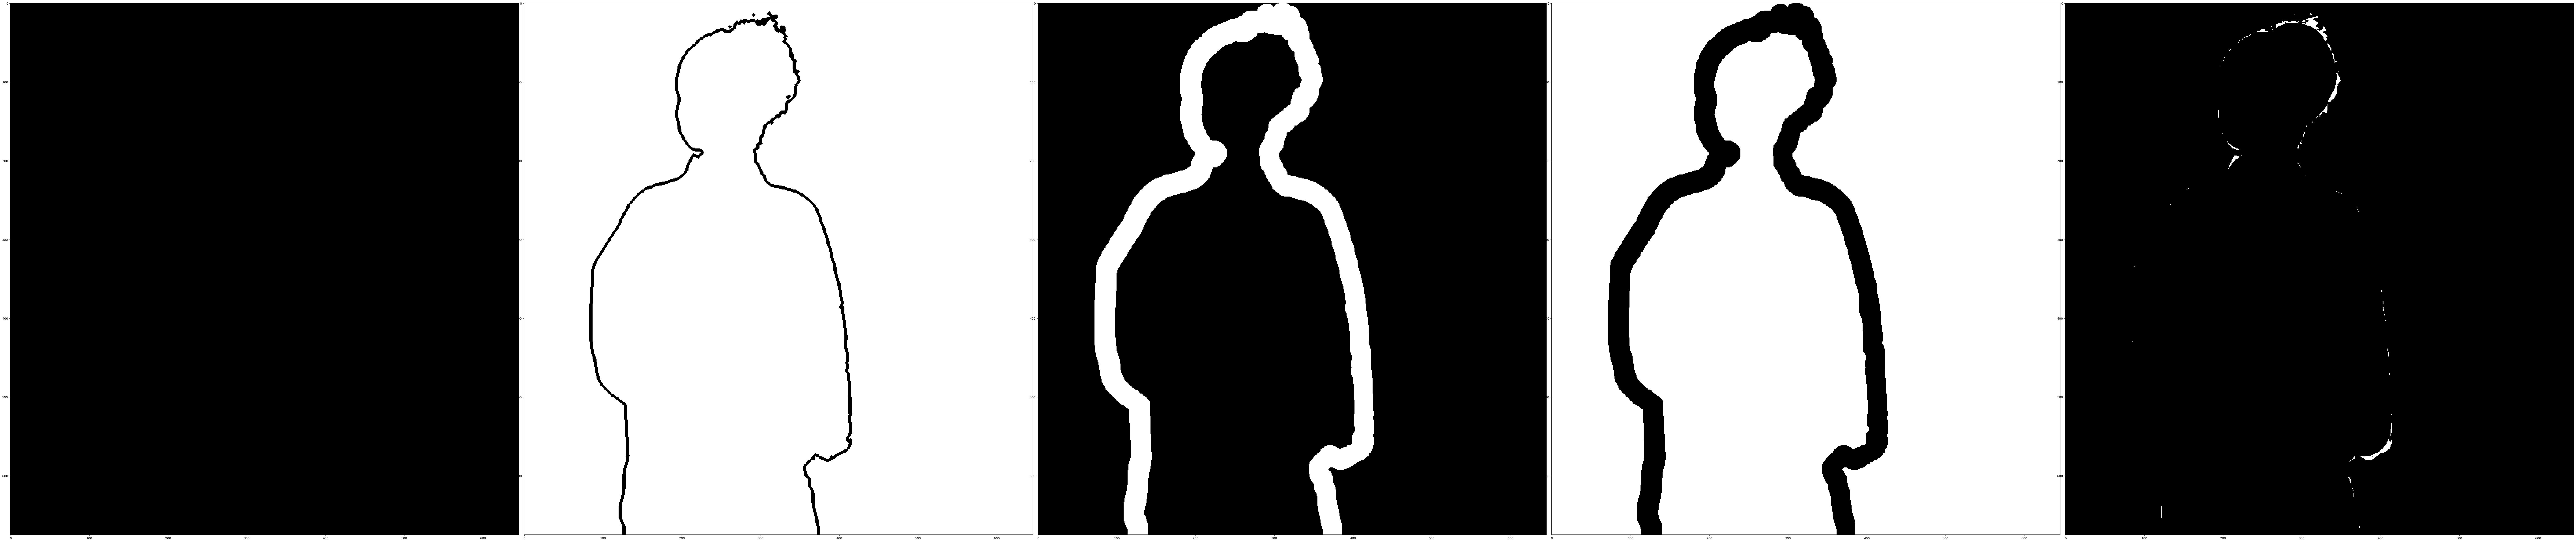

In [146]:
show_regions(data_loader[1], regioners_standard)

Result for Entire image is: (1.0, 0.43229750750642115, 0.43229750750642115).
Result for No edges pixels is: (0.9669717469160366, 0.43229750750642115, 0.41570327801923507).
Result for Mask precision is: (0.1453119105327621, 0.43229750750642115, 0.07389625893406236).
Result for Mask robust is: (0.8546880894672378, 0.43229750750642115, 0.3584012485723588).
Result for Mask details is: (0.027477894171089555, 0.43229750750642115, 0.027477894171089555).


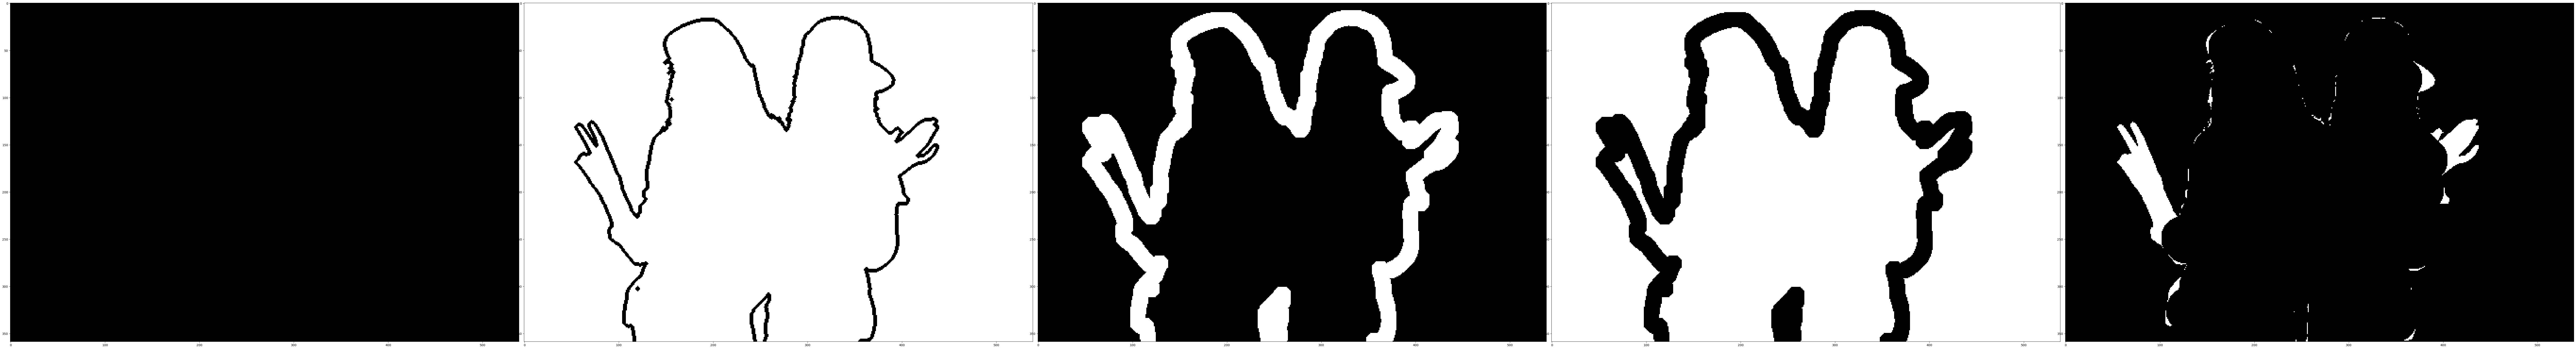

In [147]:
show_regions(data_loader[0], regioners_standard)

Result for Entire image is: (1.0, 0.3035136724492796, 0.3035136724492796).
Result for No edges pixels is: (0.9674403722088659, 0.3035136724492796, 0.28719926665167683).
Result for Mask precision is: (0.12103274123527683, 0.3035136724492796, 0.05968832696265804).
Result for Mask robust is: (0.8789672587647231, 0.3035136724492796, 0.24382534548662158).
Result for Mask details is: (0.021585346870297662, 0.3035136724492796, 0.021585346870297662).


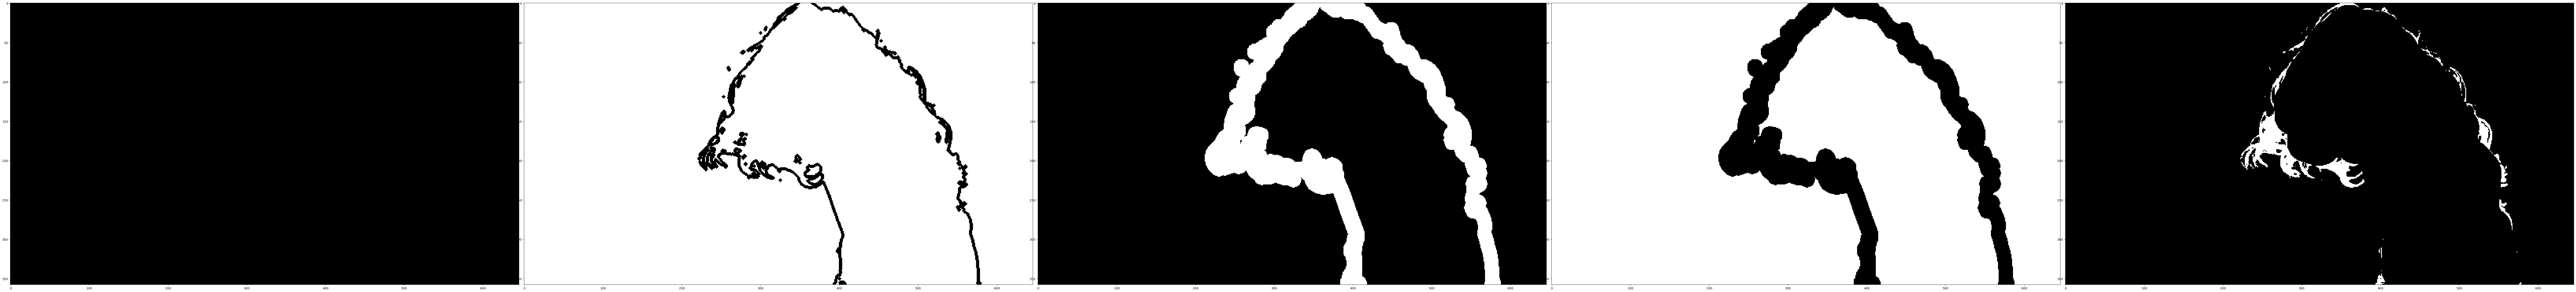

In [148]:
show_regions(data_loader[2], regioners_standard)

In [149]:
minimal_region_size = 0.005